**24BAD128 - EXP 4**\
**SCENARIO 1 (Spam Message Classification using Naïve Bayes)**

**Explanation:**

1. The program loads an SMS spam dataset containing messages labeled as ham (normal) or spam.

2. Only two columns are used:

    label (spam/ham)

    message text

**Text Preprocessing:**

1. Convert text to lowercase.

2. Remove numbers and punctuation.

3. Remove English stopwords (common words like the, is, and).

4. Cleaned messages are stored in a new column.

**Feature Extraction:**

1. Text data is converted into numerical form using TF-IDF Vectorizer.

**Model Training:**

1. Labels encoded as:

    ham = 0

    spam = 1

2. Data split into training and testing sets.

3. Multinomial Naïve Bayes classifier is trained.

**Evaluation Metrics:**

    Accuracy

    Precision

    Recall

    F1 Score

    Classification report

**Visualizations:**

1. Confusion Matrix: shows correct and wrong predictions.

2. Top Spam Words Graph: words strongly indicating spam.

3. Spam vs Ham Word Frequency: most common words in each class.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



24BAD128-Exp 4-Scenario 1
Dataset Sample:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Model Performance
Accuracy : 0.967713004484305
Precision: 1.0
Recall   : 0.76
F1 Score : 0.8636363636363636

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



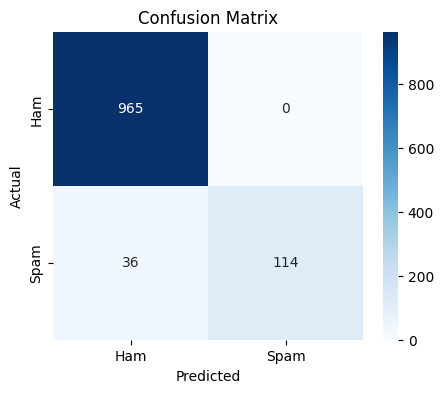


Some Misclassified Messages:
Actual : spam
Predicted: ham
--------------------------------------------------
Actual : spam
Predicted: ham
--------------------------------------------------
Actual : spam
Predicted: ham
--------------------------------------------------
Actual : spam
Predicted: ham
--------------------------------------------------
Actual : spam
Predicted: ham
--------------------------------------------------


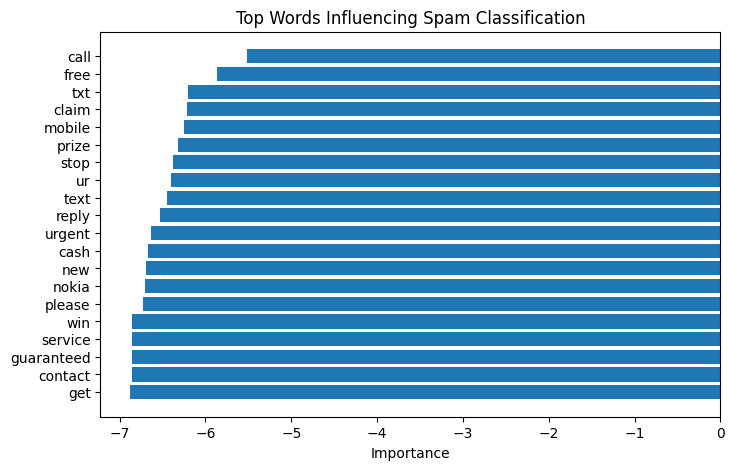

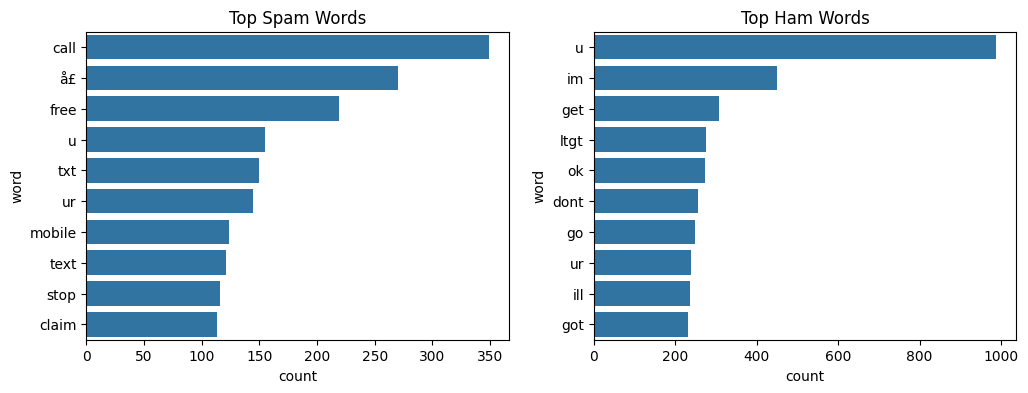

In [2]:
#from google.colab import files
#uploaded=files.upload()

#24BAD128-Exp 4-Scenario 1
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print("\n24BAD128-Exp 4-Scenario 1")

data = pd.read_csv(r"spam.csv", encoding='latin-1')

data = data[['v1','v2']]
data.columns = ['label','message']

print("Dataset Sample:")
print(data.head())

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

data['clean_message'] = data['message'].apply(clean_text)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['clean_message'])

encoder = LabelEncoder()
y = encoder.fit_transform(data['label'])   # ham=0, spam=1

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# 9. Evaluation Metrics
print("\nModel Performance")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

misclassified_indices = np.where(y_test != y_pred)[0]

print("\nSome Misclassified Messages:")
for i in misclassified_indices[:5]:
    print("Actual :", encoder.inverse_transform([y_test[i]])[0])
    print("Predicted:", encoder.inverse_transform([y_pred[i]])[0])
    print("--------------------------------------------------")

feature_names = vectorizer.get_feature_names_out()
spam_prob = model.feature_log_prob_[1]

top_spam_indices = np.argsort(spam_prob)[-20:]

plt.figure(figsize=(8,5))
plt.barh(feature_names[top_spam_indices], spam_prob[top_spam_indices])
plt.title("Top Words Influencing Spam Classification")
plt.xlabel("Importance")
plt.show()

spam_words = " ".join(data[data['label']=='spam']['clean_message']).split()
ham_words = " ".join(data[data['label']=='ham']['clean_message']).split()

spam_common = Counter(spam_words).most_common(10)
ham_common = Counter(ham_words).most_common(10)

spam_df = pd.DataFrame(spam_common, columns=['word','count'])
ham_df = pd.DataFrame(ham_common, columns=['word','count'])

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(x='count', y='word', data=spam_df)
plt.title("Top Spam Words")

plt.subplot(1,2,2)
sns.barplot(x='count', y='word', data=ham_df)
plt.title("Top Ham Words")

plt.show()



**SCENARIO 2 (Iris Flower Classification using Naïve Bayes & Logistic Regression)**

**Explanation:**

1. The built-in Iris dataset is loaded.

2. Dataset contains flower measurements:

    Sepal length & width

    Petal length & width

3. Target: flower species (3 classes).

**Preprocessing:**

1. Dataset information and statistics are displayed.

2. Features are scaled using StandardScaler.

3. Data split into training and testing sets.

4. Model 1 – Gaussian Naïve Bayes

5. Model trained for multi-class classification.

6. Predictions made on test data.

**Evaluation Metrics:**

    Accuracy

    Precision

    Recall

    F1 Score

    Classification report

**Visualizations:**

1. Confusion Matrix: prediction comparison.

2. Probability Distribution Plot: class prediction confidence.

3. Decision Boundary Plot: shows how model separates classes.

**Model 2 – Logistic Regression**

1. Another classifier trained for comparison.

2. Accuracy compared with Naïve Bayes.

24BAD128-Vibusha.G-Exp 4-Scenario 2
Dataset Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null

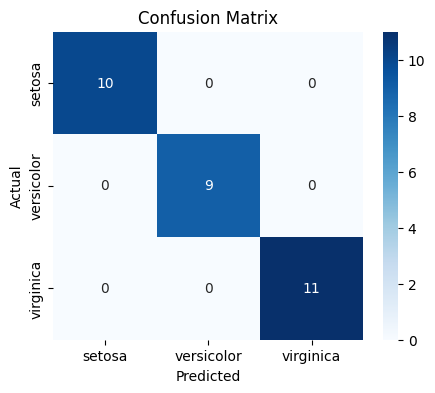


Actual vs Predicted:
   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1
5       0          0
6       1          1
7       2          2
8       1          1
9       1          1

Class Probabilities (First 5 samples):
[[5.97322611e-090 9.95635768e-001 4.36423247e-003]
 [1.00000000e+000 4.96157683e-014 6.54921950e-021]
 [7.31861098e-290 4.92947289e-012 1.00000000e+000]
 [2.81838335e-094 9.77593560e-001 2.24064404e-002]
 [1.13876385e-105 8.70022604e-001 1.29977396e-001]]


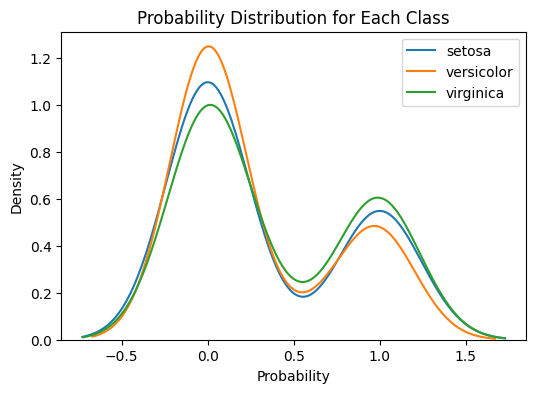


Logistic Regression Accuracy: 1.0


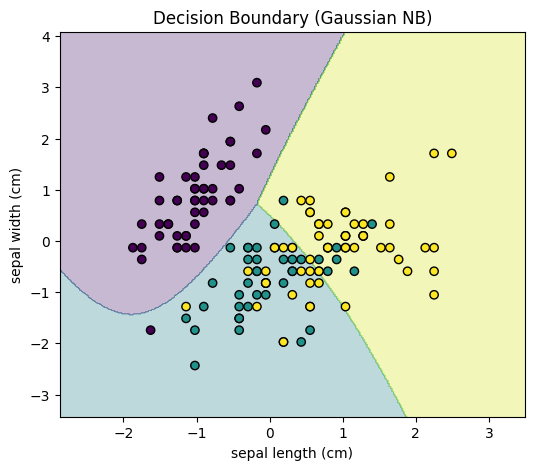

In [4]:
# 24BAD128-Vibusha.G-Exp 4-Scenario 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

print("24BAD128-Vibusha.G-Exp 4-Scenario 2")

iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

print("Dataset Sample:")
print(df.head())

# Data Preprocessing
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nClass Distribution:")
print(df['species'].value_counts())

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

# Model Evaluation
print("\nModel Performance (Gaussian NB)")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

print("\nActual vs Predicted:")
print(comparison.head(10))

probabilities = gnb.predict_proba(X_test)

print("\nClass Probabilities (First 5 samples):")
print(probabilities[:5])

plt.figure(figsize=(6,4))
for i in range(3):
    sns.kdeplot(probabilities[:, i], label=target_names[i])

plt.title("Probability Distribution for Each Class")
plt.xlabel("Probability")
plt.legend()
plt.show()

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

print("\nLogistic Regression Accuracy:",
      accuracy_score(y_test, log_pred))

X2 = X_scaled[:, :2]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = GaussianNB()
model2.fit(X2_train, y2_train)

# Create mesh grid
x_min, x_max = X2[:, 0].min()-1, X2[:, 0].max()+1
y_min, y_max = X2[:, 1].min()-1, X2[:, 1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(X2[:,0], X2[:,1], c=y, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Decision Boundary (Gaussian NB)")
plt.show()
